In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df=pd.read_csv("spam.csv",encoding="latin")

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.tail()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3079,ham,S.s:)i thinl role is like sachin.just standing...,NaN,NaN,NaN
4200,ham,Wylie update: my weed dealer carlos went to fr...,NaN,NaN,NaN
4309,spam,Someone U know has asked our dating service 2 ...,NaN,NaN,NaN
1766,spam,SMS AUCTION You have won a Nokia 7250i. This i...,NaN,NaN,NaN
3573,ham,Yeah sure I'll leave in a min,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.sample(5)

,v1,v2
2889,ham,Shuhui has bought ron's present it's a swatch ...
171,ham,"Hmmm.. Thk sure got time to hop ard... Ya, can..."
1852,spam,This is the 2nd time we have tried 2 contact u...
1606,ham,Ok no prob... I'll come after lunch then...
1192,ham,I was up all night too worrying about this app...


In [ ]:
df.rename(columns={"v1":"Target","v2":"Text"},inplace=True)

In [ ]:
df.sample(5)

,Target,Text
3665,ham,I'm turning off my phone. My moms telling ever...
331,ham,Maybe i could get book out tomo then return it...
584,ham,So how's scotland. Hope you are not over showi...
4333,ham,Boo what time u get out? U were supposed to ta...
3983,ham,"Hey, I missed you tm of last night as my phone..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

In [ ]:
df["Target"]=encode.fit_transform(df["Target"])


In [ ]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.duplicated().sum()

403

In [ ]:
df=df.drop_duplicates(keep="first")

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

In [ ]:
df["Target"].value_counts()

0    4516
1     653
Name: Target, dtype: int64

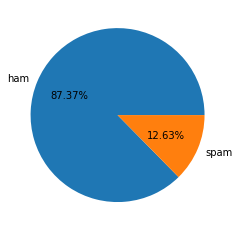

In [ ]:
plt.pie(df["Target"].value_counts(),labels=["ham","spam"],autopct="%0.2f%%")
plt.show()

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df["Num_of_characters"]=df["Text"].apply(len)

In [ ]:
df.head()

,Target,Text,Num_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df["Num_of_words"]=df["Text"].apply(lambda x: len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,Target,Text,Num_of_characters,Num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df["Num_of_sentences"]=df["Text"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,Target,Text,Num_of_characters,Num_of_words,Num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[["Num_of_characters","Num_of_words","Num_of_sentences"]].describe()

,Num_of_characters,Num_of_words,Num_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df["Target"]==0][["Num_of_characters","Num_of_words","Num_of_sentences"]].describe()

,Num_of_characters,Num_of_words,Num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df["Target"]==1][["Num_of_characters","Num_of_words","Num_of_sentences"]].describe()

,Num_of_characters,Num_of_words,Num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


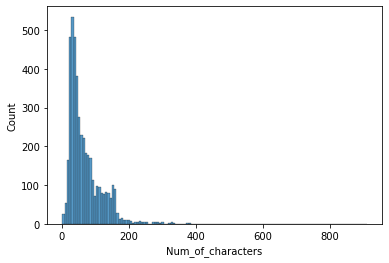

In [ ]:
sns.histplot(df[df["Target"]==0]["Num_of_characters"])
plt.show()

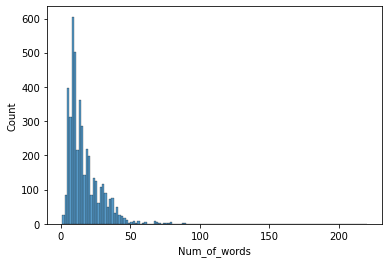

In [ ]:
sns.histplot(df[df["Target"]==0]["Num_of_words"])
plt.show()

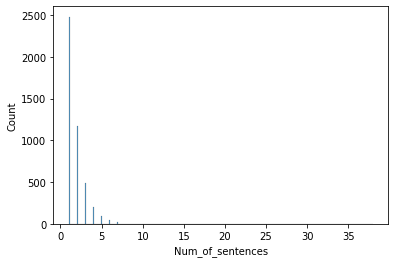

In [ ]:
sns.histplot(df[df["Target"]==0]["Num_of_sentences"])
plt.show()

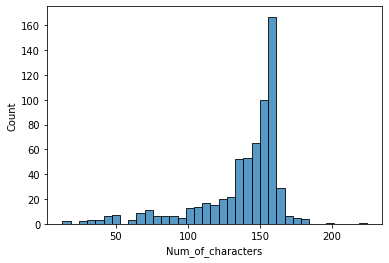

In [ ]:
sns.histplot(df[df["Target"]==1]["Num_of_characters"])
plt.show()

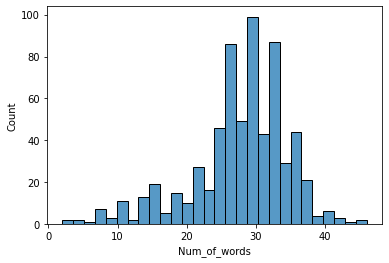

In [ ]:
sns.histplot(df[df["Target"]==1]["Num_of_words"])
plt.show()

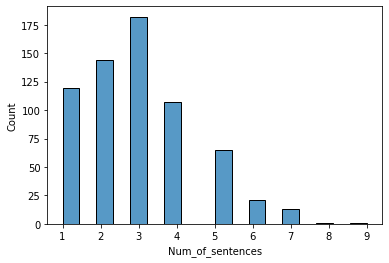

In [ ]:
sns.histplot(df[df["Target"]==1]["Num_of_sentences"])
plt.show()

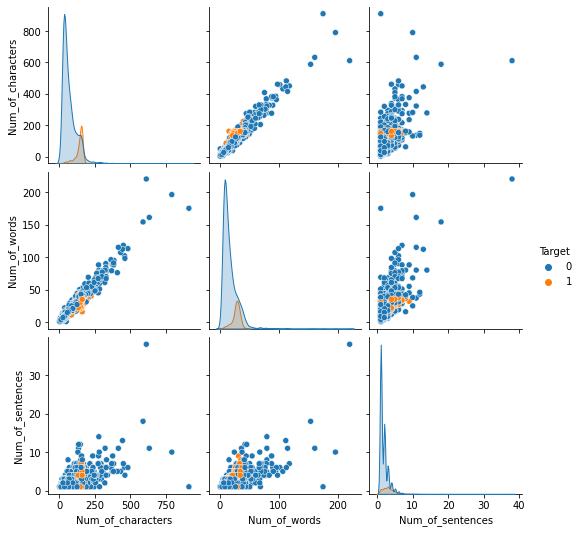

In [ ]:
sns.pairplot(df,hue="Target")
plt.show()

In [ ]:
df.corr()

,Target,Num_of_characters,Num_of_words,Num_of_sentences
Target,1.000000,0.384717,0.262912,0.263939
Num_of_characters,0.384717,1.000000,0.965760,0.624139
Num_of_words,0.262912,0.965760,1.000000,0.679971
Num_of_sentences,0.263939,0.624139,0.679971,1.000000


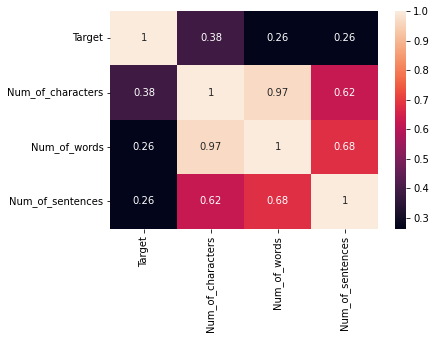

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show()

## Data Preprocessing


1.   Lower Case
2.   Tokenization
3.   Removing Special Characters
4.   Removing Stop Words and Punctuation
5.   Stemming



In [ ]:
from nltk.corpus import stopwords
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [ ]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()
  for i  in text :
    if i not in stopwords.words("english") and i not in string.punctuation:
      y.append(i)
   
  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  
  return " ".join(y)


In [ ]:
df["Transform_text"]=df["Text"].apply(transform_text)

In [ ]:
df.head()

,Target,Text,Num_of_characters,Num_of_words,Num_of_sentences,Transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

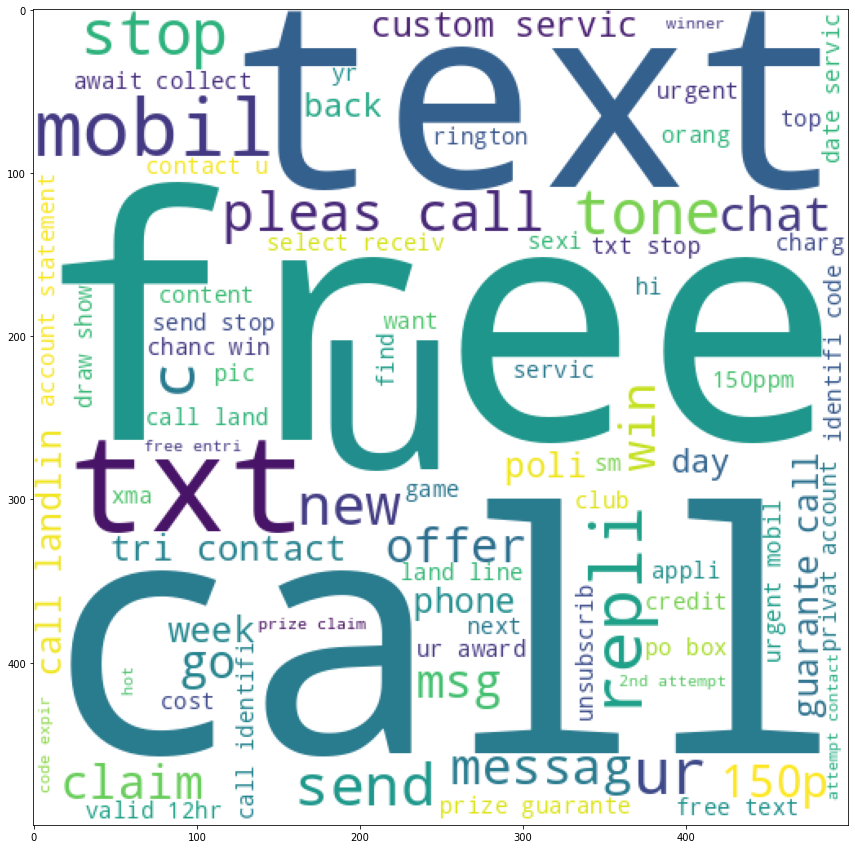

In [ ]:
plt.figure(figsize=(20,15))
spam_wc=wc.generate(df[df["Target"]==1]["Transform_text"].str.cat(sep=" "))
plt.imshow(spam_wc)
plt.show()

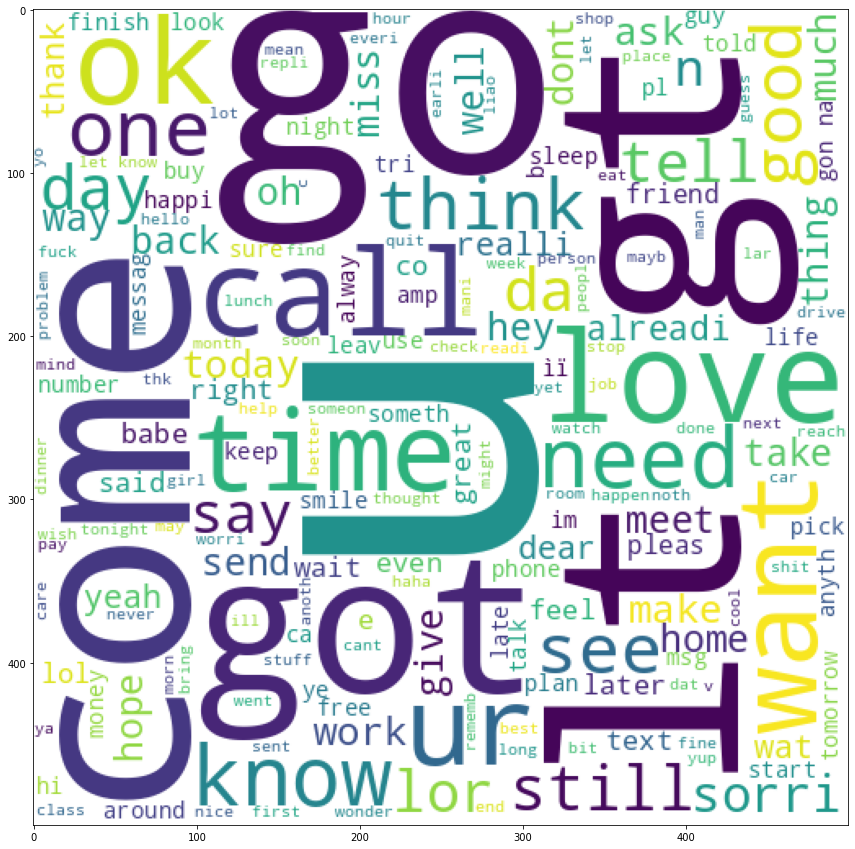

In [ ]:
plt.figure(figsize=(20,15))
spam_wc=wc.generate(df[df["Target"]==0]["Transform_text"].str.cat(sep=" "))
plt.imshow(spam_wc)
plt.show()

In [ ]:
spam_corpus=[]
for msg in df[df["Target"]==1]["Transform_text"].tolist():
  for words in msg.split():
    spam_corpus.append(words)


In [ ]:
len(spam_corpus)

9939

In [ ]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [ ]:
from collections import Counter
spam_freq=pd.DataFrame(Counter(spam_corpus).most_common(30),columns=["Messages","Frequency"])

In [ ]:
spam_freq

,Messages,Frequency
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


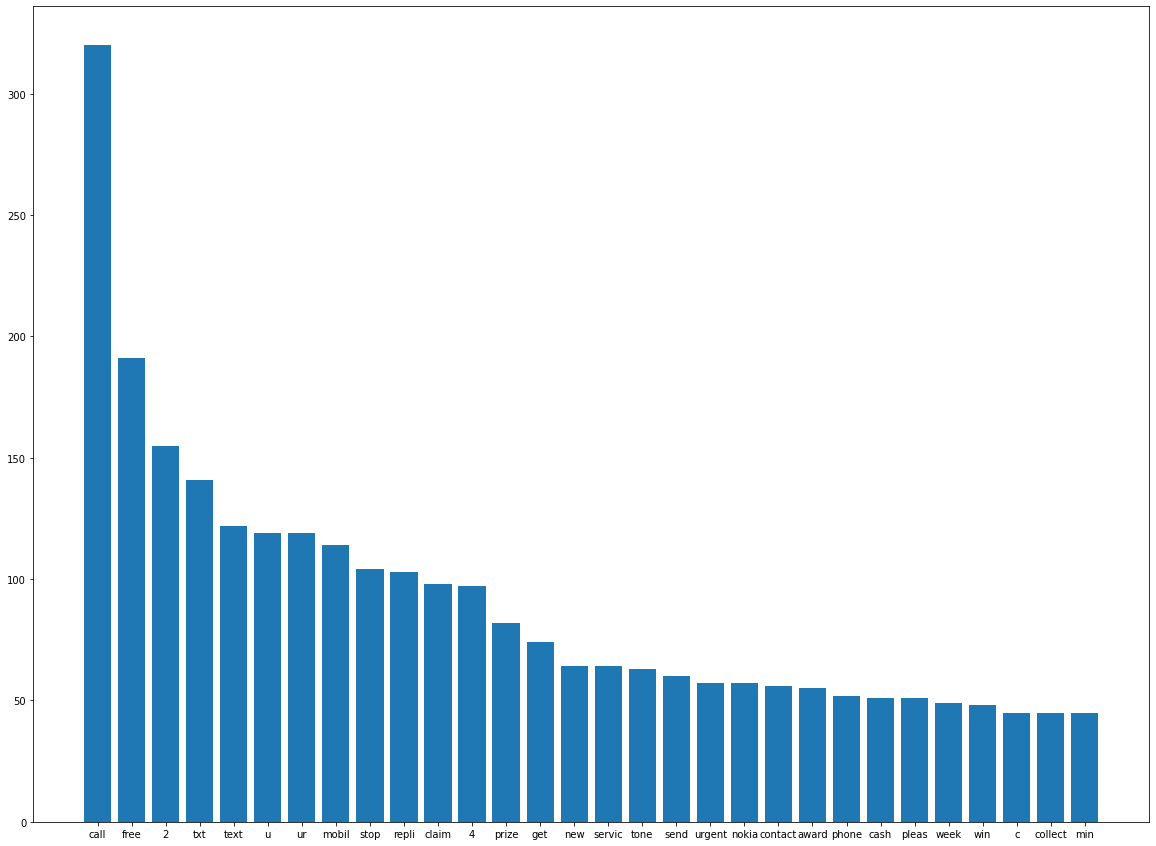

In [ ]:
plt.figure(figsize=(20,15))
plt.bar(spam_freq["Messages"],spam_freq["Frequency"])
plt.show()

In [ ]:
not_spam_corpus=[]
for msg in df[df["Target"]==0]["Transform_text"].tolist():
  for words in msg.split():
    not_spam_corpus.append(words)


In [ ]:
len(not_spam_corpus)

35404

In [ ]:
not_spam_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [ ]:
from collections import Counter
not_spam_freq=pd.DataFrame(Counter(not_spam_corpus).most_common(30),columns=["Messages","Frequency"])

In [ ]:
not_spam_freq

,Messages,Frequency
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


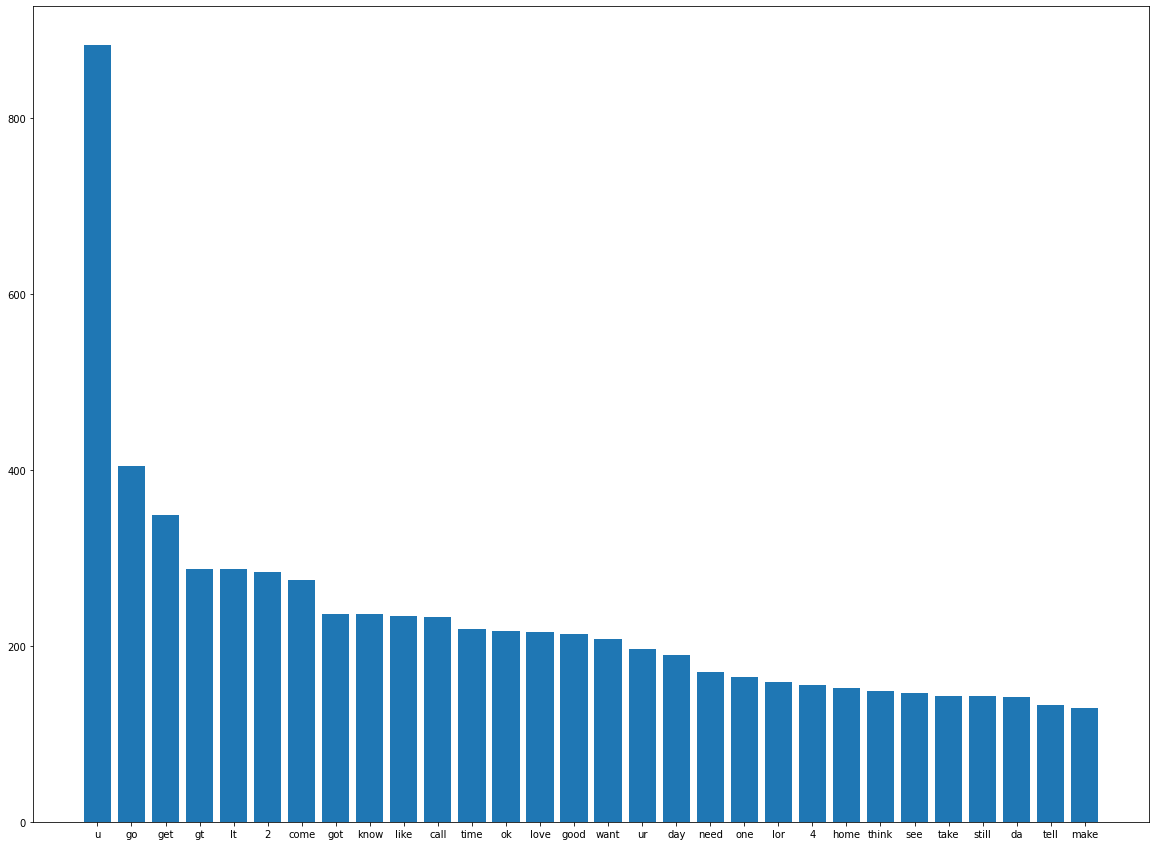

In [ ]:
plt.figure(figsize=(20,15))
plt.bar(not_spam_freq["Messages"],not_spam_freq["Frequency"])
plt.show()

#Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [ ]:
x=cv.fit_transform(df["Transform_text"]).toarray()

In [ ]:
x.shape

(5169, 6708)

In [ ]:
y=df["Target"].values

In [ ]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()


In [ ]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
gnb_acc=(accuracy_score(y_test,y_pred1)*100)
print(confusion_matrix(y_test,y_pred1))
gnb_precision=(precision_score(y_test,y_pred1)*100)

[[792 104]
 [ 20 118]]


In [ ]:
mnb.fit(x_train,y_train)
y_pred1=mnb.predict(x_test)
mnb_acc=(accuracy_score(y_test,y_pred1)*100)
print(confusion_matrix(y_test,y_pred1))
mnb_precision=(precision_score(y_test,y_pred1)*100)

[[871  25]
 [ 12 126]]


In [ ]:
from sklearn.linear_model import LogisticRegression  
lr= LogisticRegression(random_state=0)  
lr.fit(x_train, y_train)  
y_pred2=lr.predict(x_test)
lr_acc=(accuracy_score(y_test,y_pred2)*100)
print(confusion_matrix(y_test,y_pred2))
lr_precision=(precision_score(y_test,y_pred2)*100)

[[895   1]
 [ 21 117]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
knn.fit(x_train, y_train) 
y_pred3=knn.predict(x_test)
knn_acc=(accuracy_score(y_test,y_pred3)*100)
print(confusion_matrix(y_test,y_pred3))
knn_precision=(precision_score(y_test,y_pred3)*100)

[[896   0]
 [ 97  41]]


In [ ]:
from sklearn.svm import SVC 
svm = SVC(kernel='linear', random_state=0)  
svm.fit(x_train, y_train) 
y_pred4=svm.predict(x_test)
svm_acc=(accuracy_score(y_test,y_pred4)*100)
print(confusion_matrix(y_test,y_pred4))
svm_precision=(precision_score(y_test,y_pred4)*100) 

[[893   3]
 [ 20 118]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier  
dt= DecisionTreeClassifier(criterion='entropy', random_state=0)  
dt.fit(x_train, y_train)  
y_pred5=dt.predict(x_test)
dt_acc=(accuracy_score(y_test,y_pred5)*100)
print(confusion_matrix(y_test,y_pred5))
dt_precision=(precision_score(y_test,y_pred5)*100) 

[[885  11]
 [ 30 108]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier  
rf= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
rf.fit(x_train, y_train)
y_pred6=rf.predict(x_test)
rf_acc=(accuracy_score(y_test,y_pred6)*100)
print(confusion_matrix(y_test,y_pred6))
rf_precision=(precision_score(y_test,y_pred6)*100) 

[[894   2]
 [ 36 102]]


In [ ]:
Models=["GaussianNB","MultinomialNB","Logistic Regression","KNN","SVM","Decision Tree","Random Forest"]
Accuracy=[gnb_acc,mnb_acc,lr_acc,knn_acc,svm_acc,dt_acc,rf_acc]
Precision_Score=[gnb_precision,mnb_precision,lr_precision,knn_precision,svm_precision,dt_precision,rf_precision]

In [ ]:
Models=pd.DataFrame(Models,columns=["Models"])

In [ ]:
Accuracy=pd.DataFrame(Accuracy,columns=["Accuracy"])

In [ ]:
Precision_Score=pd.DataFrame(Precision_Score,columns=["Precision Score"])

In [ ]:
Model_Score_Report=pd.concat([Models,Accuracy,Precision_Score], axis=1)

In [ ]:
Model_Score_Report.sort_values(by=['Precision Score',"Accuracy"],ascending=False)

,Models,Accuracy,Precision Score
3,KNN,90.618956,100.000000
2,Logistic Regression,97.872340,99.152542
6,Random Forest,96.324952,98.076923
4,SVM,97.775629,97.520661
5,Decision Tree,96.034816,90.756303
1,MultinomialNB,96.421663,83.443709
0,GaussianNB,88.007737,53.153153


In [85]:
sms=input("Enter your SMS:")
y_pred=lr.predict(cv.transform([sms]))

Enter your SMS:Nice to meet you


In [86]:
if y_pred==0:
  print("Not Spam")
else:
  print("Spam")

Not Spam


In [ ]:
import pickle
pickle.dump(cv,open("vectorizor.pkl","wb"))
pickle.dump(rf,open("model.pkl","wb"))
